In [1094]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time, warnings
import datetime as dt

#visualizations
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns

warnings.filterwarnings("ignore")

##Get The Data

In [1095]:
pip install xlrd


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1096]:
#load the dataset

superstore_df = pd.read_excel('Sample - Superstore.xls')

superstore_df.sample(20)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6596,6597,CA-2019-157112,2019-04-23,2019-04-26,First Class,GG-14650,Greg Guthrie,Corporate,United States,Columbus,...,43229.0,East,OFF-PA-10001804,Office Supplies,Paper,Xerox 195,5.344,1,0.2,1.8704
3306,3307,CA-2016-104738,2016-12-30,2017-01-01,Second Class,SP-20620,Stefania Perrino,Corporate,United States,Laredo,...,78041.0,Central,TEC-PH-10000576,Technology,Phones,AT&T 1080 Corded phone,328.776,3,0.2,28.7679
8377,8378,CA-2017-162964,2017-11-12,2017-11-18,Standard Class,MF-18250,Monica Federle,Corporate,United States,Houston,...,77095.0,Central,OFF-ST-10002344,Office Supplies,Storage,"Carina 42""Hx23 3/4""W Media Storage Unit",64.784,1,0.2,-14.5764
7401,7402,CA-2018-110009,2018-09-08,2018-09-13,Standard Class,TR-21325,Toby Ritter,Consumer,United States,Seattle,...,98103.0,West,OFF-PA-10002615,Office Supplies,Paper,"Ampad Gold Fibre Wirebound Steno Books, 6"" x 9...",30.870,7,0.0,14.2002
1935,1936,CA-2019-101245,2019-11-27,2019-12-03,Standard Class,LW-16990,Lindsay Williams,Corporate,United States,San Francisco,...,94109.0,West,TEC-AC-10001284,Technology,Accessories,Enermax Briskie RF Wireless Keyboard and Mouse...,166.160,8,0.0,59.8176
7852,7853,CA-2016-169649,2016-12-09,2016-12-15,Standard Class,TS-21205,Thomas Seio,Corporate,United States,Chicago,...,60653.0,Central,OFF-AP-10003287,Office Supplies,Appliances,Tripp Lite TLP810NET Broadband Surge for Modem...,20.388,2,0.8,-53.0088
9504,9505,CA-2018-113607,2018-10-14,2018-10-18,Standard Class,PW-19030,Pauline Webber,Corporate,United States,New York City,...,10009.0,East,TEC-PH-10004094,Technology,Phones,Motorola L703CM,1091.930,7,0.0,272.9825
4037,4038,CA-2016-110786,2016-12-29,2017-01-02,Standard Class,AJ-10795,Anthony Johnson,Corporate,United States,San Francisco,...,94110.0,West,FUR-FU-10000550,Furniture,Furnishings,Stacking Trays by OIC,24.900,5,0.0,8.2170
9244,9245,CA-2016-113271,2016-07-09,2016-07-14,Standard Class,DS-13030,Darrin Sayre,Home Office,United States,San Francisco,...,94122.0,West,OFF-AR-10003251,Office Supplies,Art,Prang Drawing Pencil Set,5.560,2,0.0,2.2240
2497,2498,CA-2017-122371,2017-09-26,2017-10-01,Standard Class,BS-11800,Bryan Spruell,Home Office,United States,San Diego,...,92037.0,West,OFF-EN-10000056,Office Supplies,Envelopes,Cameo Buff Policy Envelopes,124.460,2,0.0,58.4962


In [1097]:
superstore_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [1098]:
print(superstore_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

### Prepare data

As customer clusters may vary by geography,from that we can see the state that have most sales is in **California**


In [1099]:
# sales = superstore_df[superstore_df['State']=='California']
sales = superstore_df.copy()

#check the shape
sales.shape

(9994, 21)

In [1100]:
sales = sales[sales['Quantity']>0]
sales.shape
#the same shape as before so we can assume no canceled order

(9994, 21)

In [1101]:
#remove rows where customerID are NA
sales.dropna(subset=['Customer ID'],how='all',inplace=True)
sales.shape
#no empty customer id too

(9994, 21)

In [1102]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'], format='%m/%d/%Y')

sales['Order Date'].dt.year.value_counts()

Order Date
2019    3312
2018    2587
2017    2102
2016    1993
Name: count, dtype: int64

In [1103]:
print("Summary..")
#exploring the unique values of each attribute
print("Number of transactions: ", sales['Order ID'].nunique())
print("Number of products bought: ",sales['Quantity'].nunique())

print("Number of customers:", sales['Customer ID'].nunique() )
print("Percentage of customers NA: ", round(sales['Customer ID'].isnull().sum() * 100 / len(superstore_df),2),"%" )



Summary..
Number of transactions:  5009
Number of products bought:  14
Number of customers: 793
Percentage of customers NA:  0.0 %


In [1104]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

#RFM Analysis

**RFM** (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups.
RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

- RECENCY (R): Days since last purchase
- FREQUENCY (F): Total number of purchases
- MONETARY VALUE (M): Total money this customer spent.

We will create those 3 customer attributes for each customer.

##Recency


 we need to choose a date point from which we **how many days ago** was the customer's last purchase.

In [1105]:
#last date available in our dataset
sales['Order Date'].max()

Timestamp('2019-12-30 00:00:00')

in this scenario the team analyze in 2021-01-01, we use this as reffrence

In [1106]:
now = dt.date(2019,12,30)
print(now)

2019-12-30


In [1107]:
#create a new column called date which contains the date of invoice only
sales['date'] = pd.DatetimeIndex(sales['Order Date']).date
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,date
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2018-11-08
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2018-11-08
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2018-06-12
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2017-10-11
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2017-10-11


In [1108]:
#group by customers and check last date of purshace
recency_df = sales.groupby(by='Customer ID', as_index=False)['date'].max()
recency_df.columns = ['Customer ID','LastPurchaseDate']
recency_df.head()

,Customer ID,LastPurchaseDate
0,AA-10315,2019-06-29
1,AA-10375,2019-12-11
2,AA-10480,2019-04-15
3,AA-10645,2019-11-05
4,AB-10015,2018-11-10


In [1109]:
#calculate recency
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (now - x).days)
recency_df.head()

,Customer ID,LastPurchaseDate,Recency
0,AA-10315,2019-06-29,184
1,AA-10375,2019-12-11,19
2,AA-10480,2019-04-15,259
3,AA-10645,2019-11-05,55
4,AB-10015,2018-11-10,415


In [1110]:
#drop LastPurchaseDate as we don't need it anymore
recency_df.drop('LastPurchaseDate',axis=1,inplace=True)
recency_df.head()

,Customer ID,Recency
0,AA-10315,184
1,AA-10375,19
2,AA-10480,259
3,AA-10645,55
4,AB-10015,415


##Frequency

Frequency helps us to know how many times a customer purchased from us. To do that we need to check how many invoices are registered by the same customer.

In [1111]:
# drop duplicates
sales_copy = sales
sales_copy.drop_duplicates(subset=['Order Date', 'Customer ID'], keep="first", inplace=True)
#calculate frequency of purchases
frequency_df = sales_copy.groupby(by=['Customer ID'], as_index=False)['Order Date'].count()
frequency_df.columns = ['Customer ID','Frequency']

# Sort the dataframe by the "Frequency" column in descending order
frequency_df = frequency_df.sort_values(by='Frequency', ascending=False)

frequency_df.head()

,Customer ID,Frequency
275,EP-13915,17
147,CK-12205,13
245,EA-14035,13
691,SH-19975,13
791,ZC-21910,13


##Monetary

Monetary attribute answers the question: **How much money did the customer spent over time?**

To do that, first, we will create a new column total revenue, since we already have sales we need to do nothing but just club the amount

In [1112]:
#i use this to confirm the calculation is right/not
#monetary_df = sales.groupby(by='Customer ID', as_index=False).agg({'TotalCost': 'sum', 'Quantity': 'sum','Sales': 'sum'})

# Group by "Customer ID" and aggregate the sum of "TotalCost" and "Quantity" for each customer
monetary_df = sales.groupby(by='Customer ID', as_index=False).agg({'Sales': 'sum'})

# Rename columns
monetary_df.columns = ['Customer ID', 'Monetary']

# Sort the DataFrame by Monetary value in descending order
#monetary_df = monetary_df.sort_values(by='Monetary', ascending=False)
monetary_df.head()

,Customer ID,Monetary
0,AA-10315,5008.480
1,AA-10375,718.000
2,AA-10480,76.502
3,AA-10645,1064.158
4,AB-10015,283.316


In [1113]:
sorted_monetary_df = monetary_df.sort_values('Monetary', ascending=False)
print(sorted_monetary_df.head())

    Customer ID   Monetary
6      AB-10105  12120.595
327    HL-15040  11713.828
730    TA-21385  11649.210
683    SE-20110  10639.654
104    BS-11365  10351.023


##Combine

In [1114]:
#merge recency dataframe with frequency dataframe
temp_df = recency_df.merge(frequency_df,on='Customer ID')
temp_df.head()

,Customer ID,Recency,Frequency
0,AA-10315,184,5
1,AA-10375,19,9
2,AA-10480,259,4
3,AA-10645,55,6
4,AB-10015,415,3


In [1115]:
#merge with monetary dataframe to get a table with the 3 columns
rfm_df = temp_df.merge(monetary_df,on='Customer ID')
#use CustomerID as index
rfm_df.set_index('Customer ID',inplace=True)
#check the head
rfm_df.head()

,Recency,Frequency,Monetary
Customer ID,,,
AA-10315,184,5,5008.480
AA-10375,19,9,718.000
AA-10480,259,4,76.502
AA-10645,55,6,1064.158
AB-10015,415,3,283.316


## Customer segments with RFM Model

The simplest way to create customers segments from RFM Model is to use ** Tertiles**. We assign a score from 1 to 3 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

In [1116]:
tertiles = rfm_df.quantile(q=[0.33,0.66])

In [1117]:
tertiles.to_dict()

{'Recency': {0.33: 41.0, 0.66: 119.0},
 'Frequency': {0.33: 5.0, 0.66: 7.0},
 'Monetary': {0.33: 605.27416, 0.66: 1414.6674400000002}}

### Creation of RFM Segments

choose how to target or deal with each segment.

For example:

**Best Customers - Champions**: Reward them. They can be early adopters to new products. Suggest them "Refer a friend".

In [1118]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = tertiles dict)
def RScore(x,p,d):
    if x <= d[p][0.33]:
        return 3
    elif x <= d[p][0.66]:
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = tertiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.33]:
        return 1
    elif x <= d[p][0.66]:
        return 2
    else:
        return 3

In [1119]:
#create rfm segmentation table
rfm_segmentation = rfm_df
rfm_segmentation['R_Tertile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',tertiles,))
rfm_segmentation['F_Tertile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',tertiles,))
rfm_segmentation['M_Tertile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',tertiles,))

In [1120]:
rfm_segmentation['RFM_Score'] = rfm_segmentation.R_Tertile.map(str) \
                            + rfm_segmentation.F_Tertile.map(str) \
                            + rfm_segmentation.M_Tertile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Tertile,F_Tertile,M_Tertile,RFM_Score
Customer ID,,,,,,,
AA-10315,184,5,5008.480,1,1,3,113
AA-10375,19,9,718.000,3,3,2,332
AA-10480,259,4,76.502,1,1,1,111
AA-10645,55,6,1064.158,2,2,2,222
AB-10015,415,3,283.316,1,1,1,111


In [1121]:
import requests
from io import StringIO

In [1122]:
segment_name = {'112':'ABOUT TO SLEEP',
                '113':'ABOUT TO SLEEP',
                '121':'ABOUT TO SLEEP',

                '122':'ABOUT TO SLEEP',
                '131':'ABOUT TO SLEEP',
                '211':'ABOUT TO SLEEP',

                '212':'ABOUT TO SLEEP',
                '221':'ABOUT TO SLEEP',

                '311':'RECENT CUSTOMER',
                '312':'RECENT CUSTOMER',
                '313':'RECENT CUSTOMER',

                '123':'CANNOT LOOSE THEM',
                '132':'CANNOT LOOSE THEM',
                '133':'CANNOT LOOSE THEM',

                '333':'CHAMPION',
                '111':'LOST CUSTOMER',

                '233':'LOYAL',
                '323':'LOYAL',
                '332':'LOYAL',

                '223':'POTENTIAL LOYALIST',
                '223':'POTENTIAL LOYALIST',
                '322':'POTENTIAL LOYALIST',
                '331':'POTENTIAL LOYALIST',

                '213':'AVERAGE',
                '222':'AVERAGE',
                '231':'AVERAGE',
                '321':'AVERAGE'}

In [1123]:
rfm_segmentation["segment_name"] = rfm_segmentation["RFM_Score"].map(segment_name)

In [1124]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Tertile,F_Tertile,M_Tertile,RFM_Score,segment_name
Customer ID,,,,,,,,
AA-10315,184,5,5008.480,1,1,3,113,ABOUT TO SLEEP
AA-10375,19,9,718.000,3,3,2,332,LOYAL
AA-10480,259,4,76.502,1,1,1,111,LOST CUSTOMER
AA-10645,55,6,1064.158,2,2,2,222,AVERAGE
AB-10015,415,3,283.316,1,1,1,111,LOST CUSTOMER


In [1125]:
rfm_segmentation[['segment_name']].value_counts()

segment_name      
ABOUT TO SLEEP        203
LOYAL                 115
LOST CUSTOMER          97
POTENTIAL LOYALIST     78
RECENT CUSTOMER        73
CANNOT LOOSE THEM      68
AVERAGE                67
CHAMPION               62
Name: count, dtype: int64

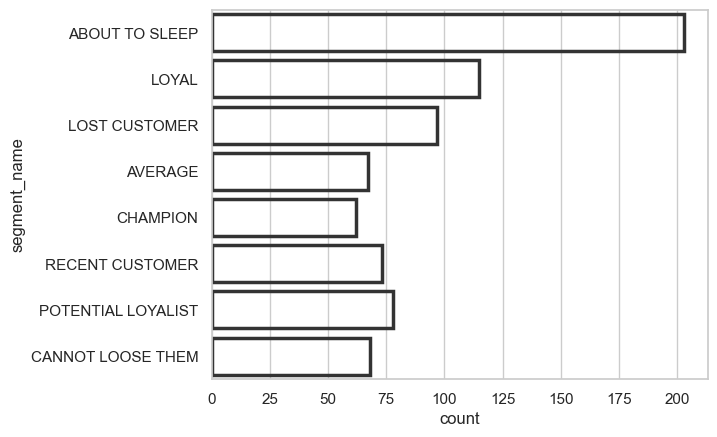

In [1126]:
#customer/segments
ax = sns.countplot(y="segment_name", data=rfm_segmentation, linewidth=2.5, facecolor=(1, 1, 1, 0), edgecolor=".2")

In [1127]:
rfm_segmentation.groupby('segment_name')['Monetary'].sum()

segment_name
ABOUT TO SLEEP        173528.4159
AVERAGE               100712.8218
CANNOT LOOSE THEM     147542.9220
CHAMPION              183704.3298
LOST CUSTOMER          21914.8130
LOYAL                 251623.6699
POTENTIAL LOYALIST    128632.0583
RECENT CUSTOMER        57442.4430
Name: Monetary, dtype: float64

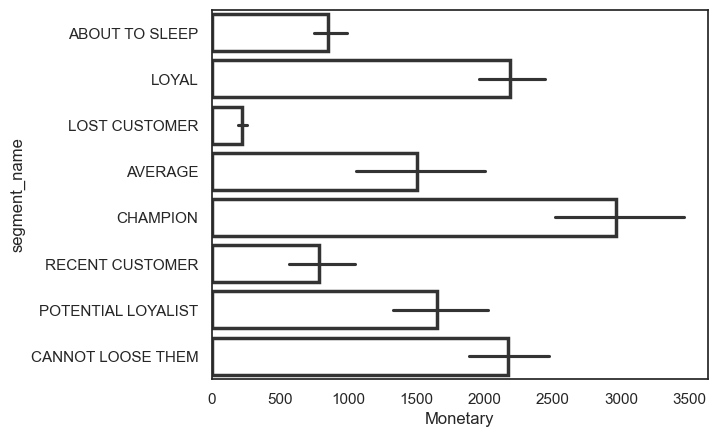

In [1128]:
#melihat dgn monetary untk menentukan mana yg mau diprioritaskan
#set seaborn plotting aesthetics
sns.set(style='white')

sns.barplot(x = "Monetary", y = "segment_name", data = rfm_segmentation ,linewidth=2.5, facecolor=(1, 1, 1, 0),
                 errcolor=".2", edgecolor=".2")

plt.show()

*The line in the middle of the bar shows us how confident we are about the average amount of money spent by each group of customers. A short line means we're very sure, and a long line means we're not as sure.*

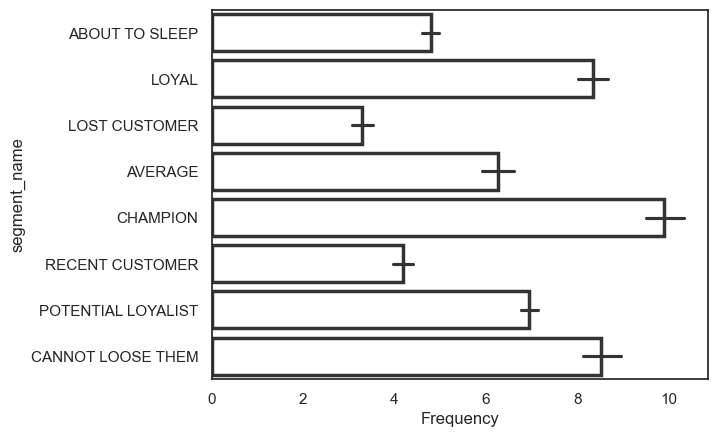

In [1129]:
#set seaborn plotting aesthetics
sns.set(style='white')

sns.barplot(x = "Frequency", y = "segment_name", data = rfm_segmentation ,linewidth=2.5, facecolor=(1, 1, 1, 0),
                 errcolor=".2", edgecolor=".2")

plt.show()

In [1130]:
rfm_segmentation.groupby('segment_name')['Frequency'].sum()

segment_name
ABOUT TO SLEEP        975
AVERAGE               420
CANNOT LOOSE THEM     580
CHAMPION              614
LOST CUSTOMER         320
LOYAL                 960
POTENTIAL LOYALIST    542
RECENT CUSTOMER       305
Name: Frequency, dtype: int64

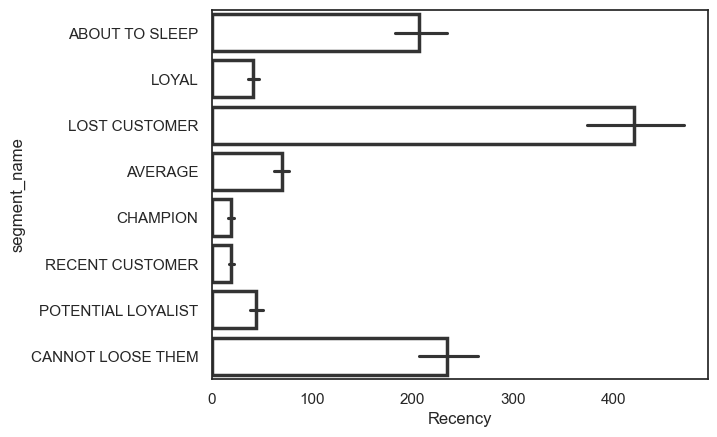

In [1131]:
#set seaborn plotting aesthetics
sns.set(style='white')

sns.barplot(x = "Recency", y = "segment_name", data = rfm_segmentation ,linewidth=2.5, facecolor=(1, 1, 1, 0),
                 errcolor=".2", edgecolor=".2")

plt.show()

In [1132]:
rfm_segmentation.groupby('segment_name')['Recency'].sum()

segment_name
ABOUT TO SLEEP        41886
AVERAGE                4694
CANNOT LOOSE THEM     15956
CHAMPION               1184
LOST CUSTOMER         40788
LOYAL                  4750
POTENTIAL LOYALIST     3456
RECENT CUSTOMER        1440
Name: Recency, dtype: int64

In [1133]:
segment_counts = rfm_segmentation.reset_index().groupby(['segment_name']).agg(N_CUST = ('Customer ID' , 'nunique')).reset_index()
segment_counts

,segment_name,N_CUST
0,ABOUT TO SLEEP,203
1,AVERAGE,67
2,CANNOT LOOSE THEM,68
3,CHAMPION,62
4,LOST CUSTOMER,97
5,LOYAL,115
6,POTENTIAL LOYALIST,78
7,RECENT CUSTOMER,73


In [1134]:
import plotly.express as px

# Aggregate count of customers per segment
segment_counts = rfm_segmentation.reset_index().groupby(['segment_name']).agg(N_CUST = ('Customer ID' , 'nunique')).reset_index()

# Create the treemap
fig = px.treemap(segment_counts,
                 path=['segment_name'],
                 values='N_CUST',  # Use count of customers as values
                 color='segment_name',
                 title='Customer Segmentation based on RFM Analysis')

# Set layout options
fig.update_layout(
    margin=dict(t=0, l=0, r=0, b=0),
    height=600,
    width=800,
    showlegend=True
)

# Show the treemap
fig.show()


### YOUR FINAL DATA IS **rfm_segmentation**

We need you to create ML based Segments, but be wise what variables should you take forward for clustering?

Your target is to compare the Clusters Created by ML vs the RFM Clusters. Hence you need to interpret ML Clusters Created.

For now you have already done EDA in above cells over R F M Variables. So proceed to implement post EDA Steps for Clustering i.e to create Clusters and explain them, You will use KMeans Algorithm and implement the Best K by Elbow Method and So On

**Marks : Total 35**

- Implement K Means Algorithm (2 Marks)
- Find Best Values of K (2.5 Marks Best Value + 2.5 Marks Explanation of Choice)
- Cluster Prediction and Association to Data (3 Marks)
- Analyziing Clusters with Top Level Statistics (2.5 Marks Values + 2.5 Interpretation)
- Post Clustering EDA of Clusters (10 Marks per detail Analysis of each Variable)
- Finding distribution of RFM based Segments in ML Clusters (10 Marks for Insights)


• Recency: The time since last order with the product of customers.

• Frequency: The total number of transaction between the customer’s invoice date and reference day.

• Monetary: The total transaction value of customers.

## Data Preparation & Preprocessing

Lower Recency = higher score

Higher Frequency, Monetary = higher score

### Scaling is vital in K-means because it stops features with big numbers from unfairly dominating the distance calculation.

### i selected only the core RFM variables (Recency, Frequency, Monetary), handled outliers by capping extreme values in Monetary at the 99th percentile, applied log transformation to Monetary to fix its skewness, and standardized all variables using StandardScaler. This was done because K-Means clustering works best with balanced, normally distributed data to avoid one variable dominating others.

In [1135]:
rfm_segmentation.sample(9)



,Recency,Frequency,Monetary,R_Tertile,F_Tertile,M_Tertile,RFM_Score,segment_name
Customer ID,,,,,,,,
HE-14800,12,4,353.782,3,1,1,311,RECENT CUSTOMER
AW-10930,46,7,1579.076,2,2,3,223,POTENTIAL LOYALIST
SC-20800,30,4,232.912,3,1,1,311,RECENT CUSTOMER
AH-10120,60,7,871.184,2,2,2,222,AVERAGE
BF-11215,65,4,895.876,2,1,2,212,ABOUT TO SLEEP
BD-11620,69,6,1283.146,2,2,2,222,AVERAGE
KB-16240,4,6,1700.295,3,2,3,323,LOYAL
BP-11095,17,12,1009.128,3,3,2,332,LOYAL
MG-18205,264,1,12.320,1,1,1,111,LOST CUSTOMER


In [1158]:
rfm_segmentation.describe()

,Recency,Frequency,Monetary,R_Tertile,F_Tertile,M_Tertile,ML_Cluster
count,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000
mean,146.769231,6.295082,1380.774773,2.002522,1.885246,2.010088,1.535939
std,186.091317,2.533351,1491.299280,0.821119,0.841293,0.819521,1.014557
min,0.000000,1.000000,4.833000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,5.000000,412.270000,1.000000,1.000000,1.000000,1.000000
50%,75.000000,6.000000,963.580000,2.000000,2.000000,2.000000,1.000000
75%,183.000000,8.000000,1806.710000,3.000000,3.000000,3.000000,2.000000
max,1164.000000,17.000000,12120.595000,3.000000,3.000000,3.000000,3.000000


In [1136]:
rfm_segmentation.shape



(793, 8)

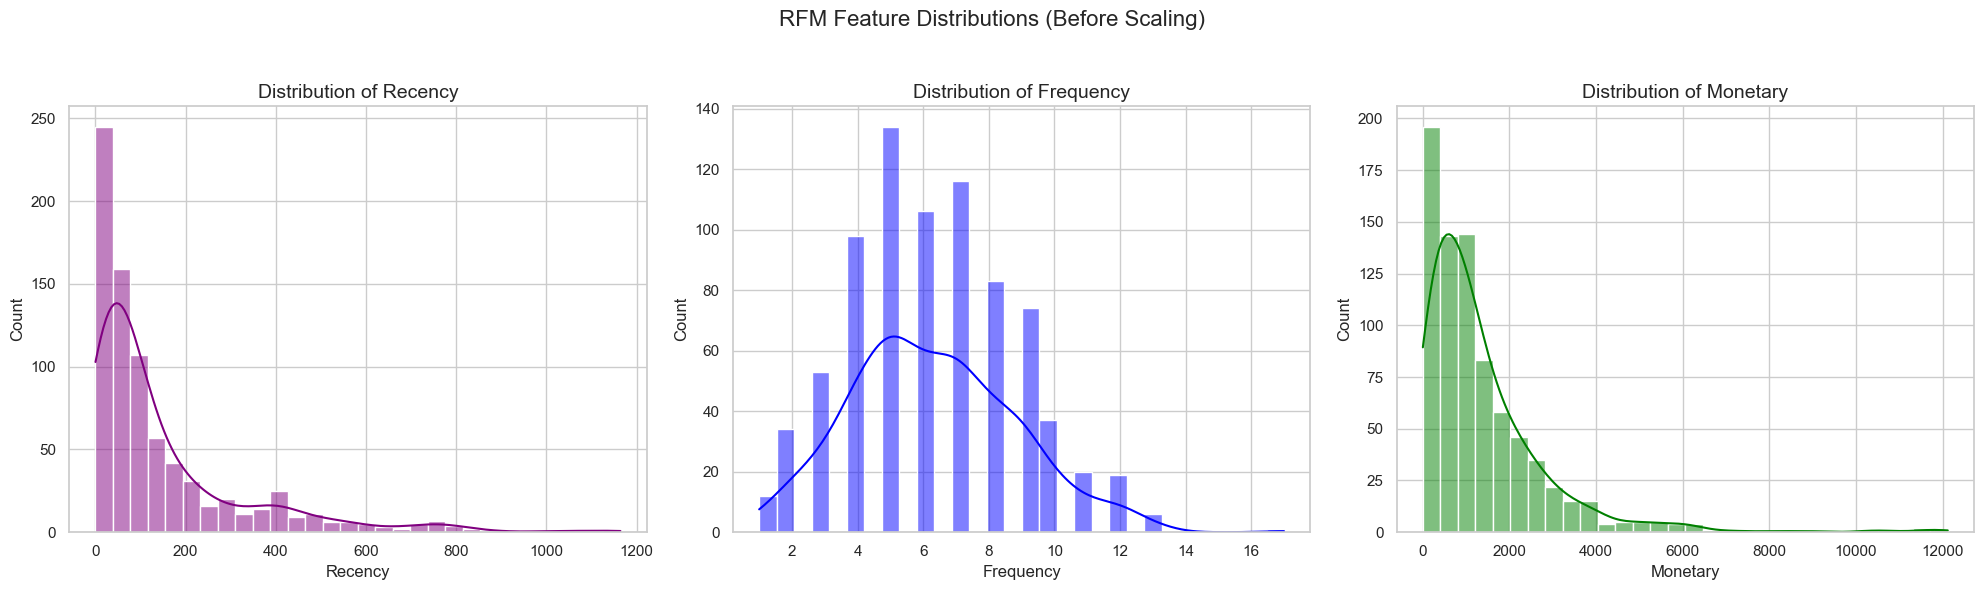

In [1137]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")


fig, ax = plt.subplots(1, 3, figsize=(20, 6))


sns.histplot(data=rfm_segmentation, x="Recency", color="purple", bins=30, kde=True, ax=ax[0])
sns.histplot(data=rfm_segmentation, x="Frequency", color="blue", bins=30, kde=True, ax=ax[1])
sns.histplot(data=rfm_segmentation, x="Monetary", color="green", bins=30, kde=True, ax=ax[2])




for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    ax[i].set_title(f"Distribution of {col}", fontsize=14)
  ax[i].set_xlabel(col)
    ax[i].set_ylabel("Count")


fig.suptitle("RFM Feature Distributions (Before Scaling)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### 
As it can be clearly seen that RFM attributes are highly skewed. The log transformation will be used to transform skewed data to approximately conform to normality.

In [1138]:
rfm_ml   = rfm_segmentation[['Recency', 'Frequency', 'Monetary']].copy()


KMeans needs numeric continuous variables, not labels.

Mixing derived fields (like RFM_Score) biases clustering, making it mathematically meaningless

#### Clip Monetary at 99th percentile to reduce extreme outlier impact

In [1139]:

monetary_99 =  rfm_ml['Monetary'].quantile(0.99)
rfm_ml['Monetary' ]  = rfm_ml['Monetary'].clip(upper=monetary_99)


rfm_ml['Monetary_log'] = np.log1p(rfm_ml['Monetary'])


##### log-transform to Monetary to reduce skew and normalize distribution for ML

In [1140]:
rfm_ml.drop( columns='Monetary', inplace=True)

KMeans uses Euclidean distance. Unscaled data makes large-scale variables overpower others, causing meaningless clusters.

In [1141]:
import numpy as np


rfm_ml['Recency'] = np.log1p(rfm_ml['Recency'])


In [1142]:
rfm_ml.head()


,Recency,Frequency,Monetary_log
Customer ID,,,
AA-10315,5.220356,5,8.519087
AA-10375,2.995732,9,6.577861
AA-10480,5.560682,4,4.350304
AA-10645,4.025352,6,6.970878
AB-10015,6.030685,3,5.650086


In [1143]:
 rfm_ml[['Recency',   'Frequency',   'Monetary_log']].skew()


Recency        -0.383433
Frequency       0.357662
Monetary_log   -0.837391
dtype: float64

In [1144]:

scaler = StandardScaler()
rfm_scaled = pd.DataFrame(
    scaler.fit_transform(rfm_ml),
    columns=rfm_ml.columns,
    index=rfm_ml.index
)

In [1145]:

rfm_scaled.head(9)


,Recency,Frequency,Monetary_log
Customer ID,,,
AA-10315,0.722904,-0.511536,1.576428
AA-10375,-0.976662,1.068397,-0.101726
AA-10480,0.982906,-0.906519,-2.027407
AA-10645,-0.190055,-0.116552,0.238030
AB-10015,1.341979,-1.301502,-0.903770
AB-10060,-0.203820,0.673414,0.912520
AB-10105,-0.409838,1.463380,1.833491
AB-10150,-0.409838,-0.511536,-1.208438
AB-10165,-0.776221,0.673414,-0.302856


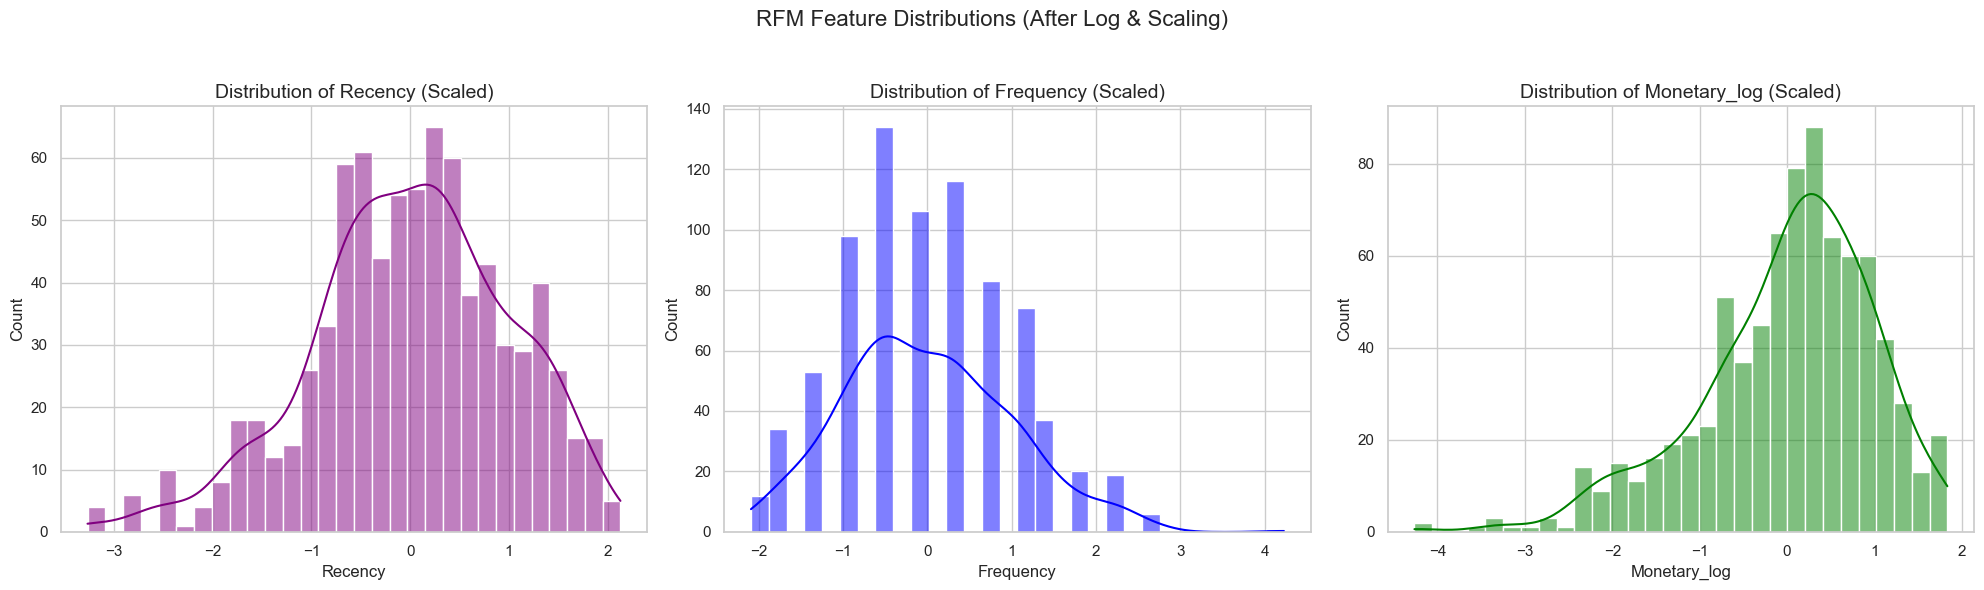

In [1146]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

fig, ax =   plt.subplots(1, 3, figsize=(20, 6))


sns.histplot(rfm_scaled,   x="Recency", color="purple", bins=30, kde=True, ax=ax[0])
sns.histplot(rfm_scaled,   x="Frequency", color="blue", bins=30, kde=True, ax=ax[1])
sns.histplot(rfm_scaled,   x="Monetary_log", color="green", bins=30, kde=True, ax=ax[2])

for i, col in enumerate(['Recency',  'Frequency', 'Monetary_log']):
    ax[i].set_title(f"Distribution of {col} (Scaled)", fontsize=14)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel("Count")



fig.suptitle("RFM Feature Distributions (After Log & Scaling) ", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Choosing k blindly risks underfitting (too few clusters) or overfitting (too many meaningless micro-clusters).

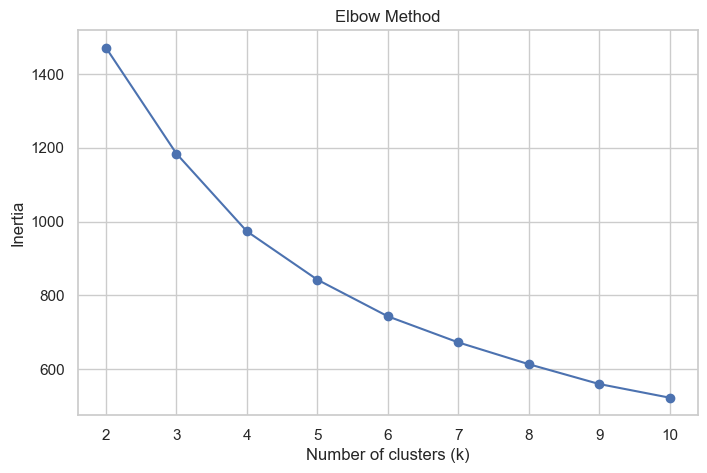

In [1147]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


inertias = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=50)
    kmeans.fit(rfm_scaled)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(K, inertias, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


 inverse_transform() reverses scaling, bringing centers back to the original RFM scale for interpretation.

In [1148]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters= 4, random_state=42, n_init=100)
rfm_segmentation['ML_Cluster'] = kmeans.fit_predict(rfm_scaled)




In [1149]:


cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=rfm_ml.columns
)

# Convert log columns back to original units
cluster_centers['Monetary'] = np.expm1(cluster_centers['Monetary_log'])
cluster_centers['Recency'] = np.expm1(cluster_centers['Recency'])  

cluster_centers['Cluster'] = range(kmeans.n_clusters)
cluster_centers = cluster_centers[['Recency','Frequency','Monetary','Cluster']].round(2)
cluster_centers


,Recency,Frequency,Monetary,Cluster
0,167.12,3.42,128.44,0
1,153.11,5.27,982.96,1
2,60.91,9.17,1818.96,2
3,12.55,6.41,919.76,3


In [1150]:
rfm_segmentation.sample(3)

,Recency,Frequency,Monetary,R_Tertile,F_Tertile,M_Tertile,RFM_Score,segment_name,ML_Cluster
Customer ID,,,,,,,,,
JR-16210,33,5,1166.250,3,1,2,312,RECENT CUSTOMER,3
SP-20620,47,9,904.008,2,3,2,232,NaN,2
BD-11635,9,3,395.320,3,1,1,311,RECENT CUSTOMER,3


In [1151]:
rfm_segmentation.groupby('ML_Cluster')[['Recency', 'Frequency', 'Monetary']].agg(['mean','median'])



Recency        Frequency            Monetary          
                  mean median      mean median         mean    median
ML_Cluster                                                           
0           281.093525  203.0  3.424460    4.0   169.676348   151.158
1           211.761538  125.0  5.273077    5.0  1296.983049   961.693
2            85.937500   57.0  9.174107    9.0  2291.903339  1900.799
3            17.694118   15.5  6.411765    6.0  1298.632009   961.885

Cluster 0 → AT RISK: retention campaigns.

Cluster 2 → Champions : reward top customers.

Cluster 3 → Recent / Active Customers: upsell/cross-sell.

Cluster 1 → Potential Loyal:  nurturing campaigns.

In [1152]:
rfm_segmentation.head()



,Recency,Frequency,Monetary,R_Tertile,F_Tertile,M_Tertile,RFM_Score,segment_name,ML_Cluster
Customer ID,,,,,,,,,
AA-10315,184,5,5008.480,1,1,3,113,ABOUT TO SLEEP,1
AA-10375,19,9,718.000,3,3,2,332,LOYAL,3
AA-10480,259,4,76.502,1,1,1,111,LOST CUSTOMER,0
AA-10645,55,6,1064.158,2,2,2,222,AVERAGE,1
AB-10015,415,3,283.316,1,1,1,111,LOST CUSTOMER,0


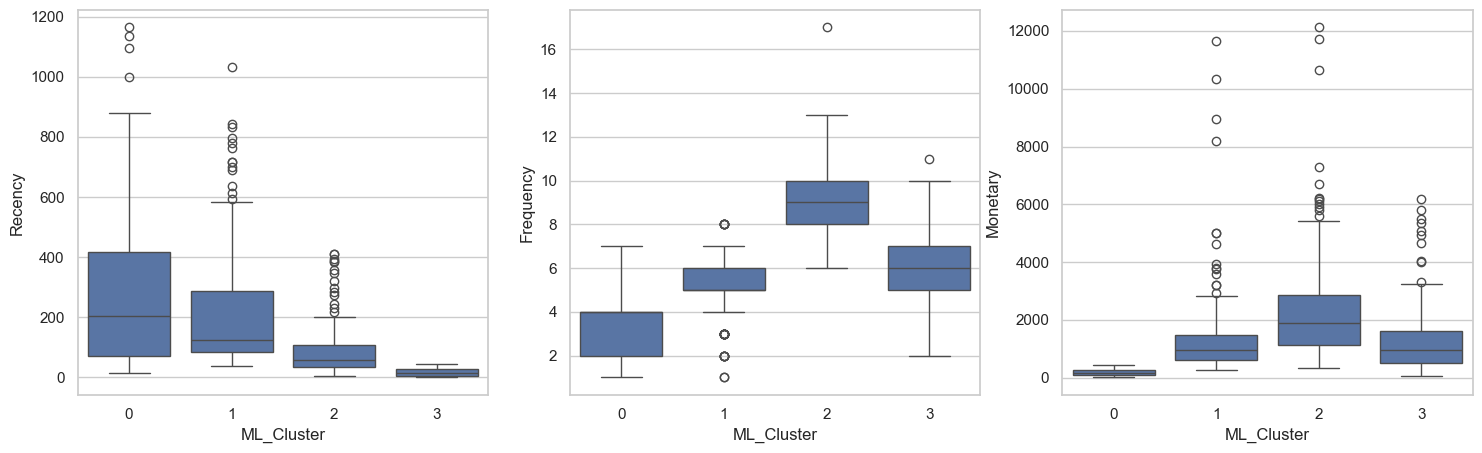

In [1153]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplots
fig, axs = plt.subplots(1,3,figsize=(18,5))
sns.boxplot(x='ML_Cluster', y='Recency', data=rfm_segmentation, ax=axs[0])
sns.boxplot(x='ML_Cluster', y='Frequency', data=rfm_segmentation, ax=axs[1])
sns.boxplot(x='ML_Cluster', y='Monetary', data=rfm_segmentation, ax=axs[2])
plt.show()



In [1154]:
segment_cluster_dist = pd.crosstab(
    rfm_segmentation['segment_name'], 
    rfm_segmentation['ML_Cluster'], 
    
    normalize='index'
)





cluster_name_map = {
    0: 'At-Risk / About to Sleep',
    1: 'Potential Loyal / Average',
    2: 'Champions / High-Value',
    3: 'Recent / Active'
}

segment_cluster_dist.rename(columns=cluster_name_map, inplace=True)


segment_cluster_dist


ML_Cluster,At-Risk / About to Sleep,Potential Loyal / Average,Champions / High-Value,Recent / Active
segment_name,,,,
ABOUT TO SLEEP,0.172414,0.822660,0.000000,0.004926
AVERAGE,0.029851,0.656716,0.089552,0.223881
CANNOT LOOSE THEM,0.000000,0.294118,0.705882,0.000000
CHAMPION,0.000000,0.000000,0.725806,0.274194
LOST CUSTOMER,0.855670,0.144330,0.000000,0.000000
LOYAL,0.000000,0.000000,0.617391,0.382609
POTENTIAL LOYALIST,0.000000,0.166667,0.307692,0.525641
RECENT CUSTOMER,0.260274,0.027397,0.000000,0.712329


### KMeans clusters → to see how cleanly ML grouped the customers.

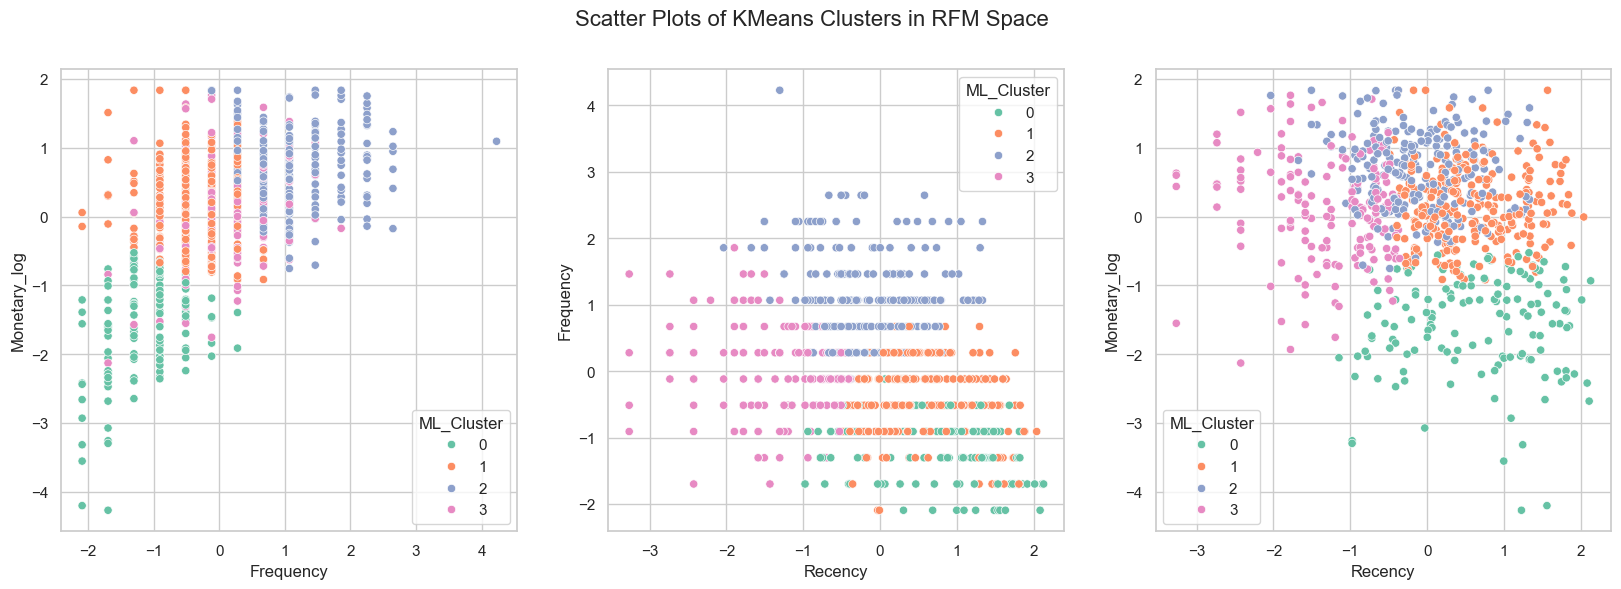

In [1155]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 3, figsize=(20, 6))


sns.scatterplot(
    x=rfm_scaled["Frequency"], 
    y=rfm_scaled["Monetary_log"], 
    hue=rfm_segmentation["ML_Cluster"], 
    palette="Set2",
    ax=ax[0]
)
sns.scatterplot(
    x=rfm_scaled["Recency"], 
    y=rfm_scaled["Frequency"], 
    hue=rfm_segmentation["ML_Cluster"], 
    palette="Set2",
    ax=ax[1]
)
sns.scatterplot(
    x=rfm_scaled["Recency"], 
    y=rfm_scaled["Monetary_log"], 
    hue=rfm_segmentation["ML_Cluster"], 
    palette="Set2",
    ax=ax[2]
)



fig.suptitle("Scatter Plots of KMeans Clusters in RFM Space", fontsize=16)
plt.show()


### visualizing 4 RFM score groups → to compare with ML clusters.

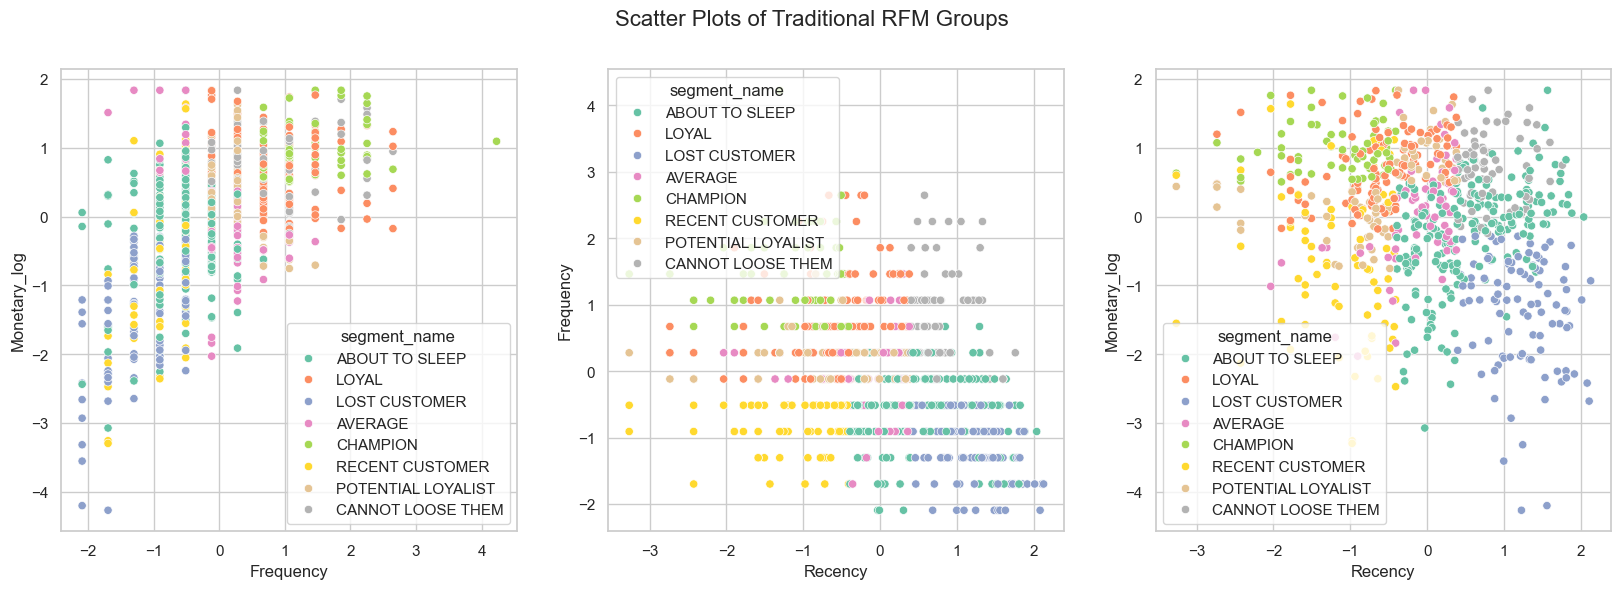

In [1156]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 3, figsize=(20, 6))



sns.scatterplot(
    x=rfm_scaled["Frequency"], 
    y=rfm_scaled["Monetary_log"], 
    hue=rfm_segmentation["segment_name"], 
    palette="Set2",
    ax=ax[0]
)
sns.scatterplot(
    x=rfm_scaled["Recency"], 
    y=rfm_scaled["Frequency"], 
    hue=rfm_segmentation["segment_name"], 
    palette="Set2",
    ax=ax[1]
)
sns.scatterplot(
    x=rfm_scaled["Recency"], 
    y=rfm_scaled["Monetary_log"], 
    hue=rfm_segmentation["segment_name"], 
    palette="Set2",
    ax=ax[2]
)

fig.suptitle("Scatter Plots of Traditional RFM Groups", fontsize=16)
plt.show()


### ML clusters are often more distinct, making them better for marketing campaigns.

## post-clustering EDA visualization to understand the shape and separation of clusters in full RFM (3d)space.

Raw RFM just puts people in broad categories (like “LOYAL” or “CHAMPION”).

ML clusters look at all three values together and naturally group customers based on real patterns.

This finds hidden differences: for example, some “LOYAL” customers are actually recent buyers, some are true high-value champions  which raw RFM misses.

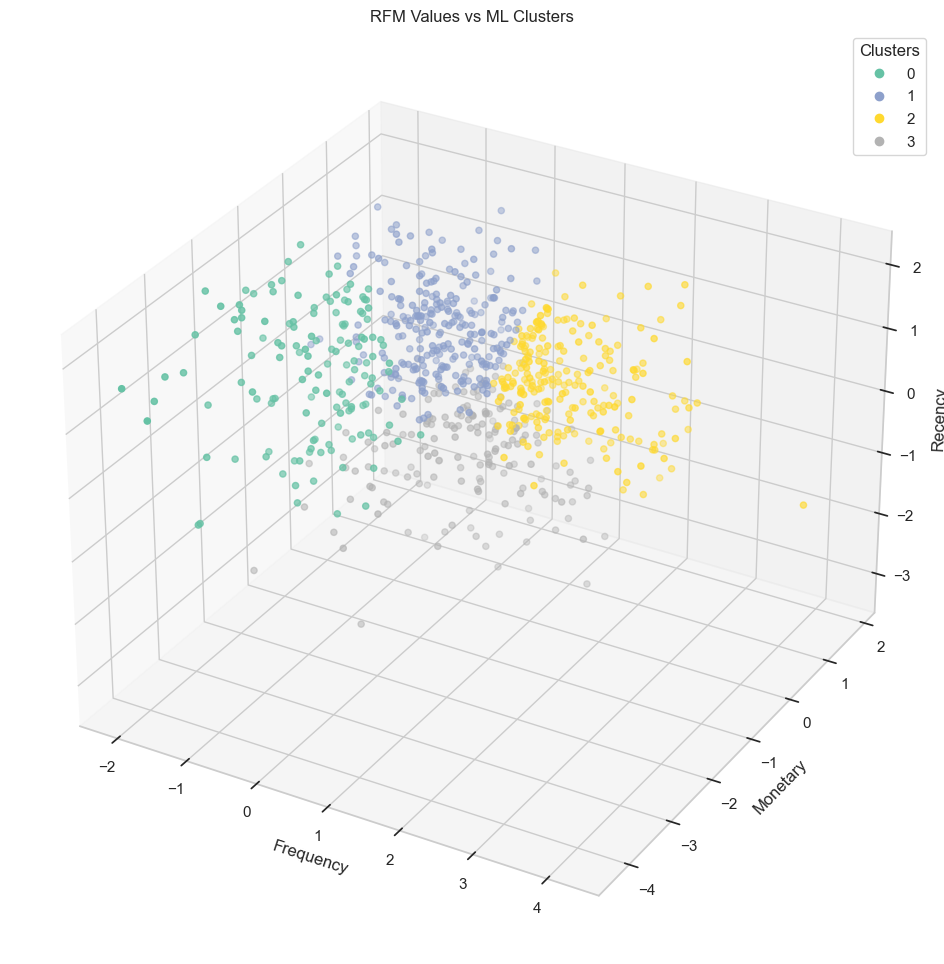

In [1157]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')


sc = ax.scatter(
    rfm_scaled["Frequency"], 
    rfm_scaled["Monetary_log"], 
    rfm_scaled["Recency"], 
    c=rfm_segmentation["ML_Cluster"], 
    cmap='Set2'
)




ax.set_xlabel("Frequency")
ax.set_ylabel("Monetary")
ax.set_zlabel("Recency")
ax.set_title("RFM Values vs ML Clusters")

plt.legend(*sc.legend_elements(), title="Clusters" )

plt.show()


## Recommendations
The company can create different marketing campaigns for the customer segments to grow revenue based on online retailer policies. In that sense, the company can offer incentives to low-value customers to keep them engaged and increase their frequency of orders. On the other hand, they can offer privileges such as exclusive discounts and early access to new products. Overall, it depends on what the company's business goal is.

Now y=i know exactly who to reward (Cluster 2), who to nurture (Cluster 1), who to re-engage (Cluster 0), and who has growth potential (Cluster 3).

RFM alone couldn’t separate these nuanced groups clearly — ML clustering revealed actionable segments.

# but still this clustering needs much more improvementt 
## BUt overall
I used RFM and KMeans to understand customer behavior. RFM gave broad groups, but KMeans separated customers more clearly—like true high-value buyers, recent active ones, medium-value loyal, and dormant customers. Scaling and log-transform helped the clustering work properly. Overall, the ML clusters show actionable insights that RFM alone couldn’t, making it easier to plan targeted campaigns.